# Portfolio builder
*Made by [Marco Moscatelli](https://github.com/MoscatelliMarco)*

Find the best combination of index funds, etfs, stocks, and bonds which has the best sharpe across a variable time period.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random
import matplotlib.colors as mcolors
import math
import sys

##### Tickets

In [2]:
# All the tickets that are going to be analyzed
tickets = {
    "GOVT": {
        "ticket_company_name": "US Gov Bonds ETF",
        "type": "bonds",
        "sector": "Financial Services"
    },
    "GC=F": {
        "ticket_company_name": "Gold",
        "type": "commodities",
        "sector": "Mining"
    },
    "SI=F": {
        "ticket_company_name": "Silver",
        "type": "commodities",
        "sector": "Mining"
    },
    "NG=F": {
        "ticket_company_name": "Gas",
        "type": "commodities",
        "sector": "Oil & Gas"
    },
    "FIW": {
        "ticket_company_name": "First Trust Water",
        "type": "etfs",
        "sector": "Industrial Goods & Machinery"
    },
    "PPA": {
        "ticket_company_name": "Invesco Aerospace & Defense ETF",
        "type": "etfs",
        "sector": "Aerospace & Defense"
    },
    "IXJ": {
        "ticket_company_name": "Healthcare",
        "type": "etfs",
        "sector": "Healthcare"
    },
    "IYT": {
        "ticket_company_name": "Transportation",
        "type": "etfs",
        "sector": "Transport, Infrastructure & Logistics"
    },
    "VDE": {
        "ticket_company_name": "Vanguard Energy ETF",
        "type": "etfs",
        "sector": "Oil & Gas"
    },
    "VOO": {
        "ticket_company_name": "Vanguard S&P 500 ETF",
        "type": "etfs",
        "sector": "General"
    },
    "QQQ": {
        "ticket_company_name": "Invesco QQQ Trust Series 1",
        "type": "etfs",
        "sector": "General"
    },
    "SGDM": {
        "ticket_company_name": "Sprott Gold Miners ETF",
        "type": "etfs",
        "sector": "Mining"
    },
    "FLRN": {
        "ticket_company_name": "SPDR Bloomberg Investment Grade Floating Rate ETF",
        "type": "etfs",
        "sector": "Financial Services"
    },
    "JMBUX": {
        "ticket_company_name": "JPMorgan Mortgage-Backed Securities R6",
        "type": "etfs",
        "sector": "Financial Services"
    },
    "BND": {
        "ticket_company_name": "Vanguard Total Bond Market Index Fund",
        "type": "etfs",
        "sector": "Financial Services"
    },
    "MDHQX": {
        "ticket_company_name": "BlackRock Total Return Fund",
        "type": "etfs",
        "sector": "Financial Services"
    },
    "SMH": {
        "ticket_company_name": "VanEck Semiconductor ETF",
        "type": "etfs",
        "sector": "Technology, Media & Telecom"
    },
    "SOXX": {
        "ticket_company_name": "iShares Semiconductor ETF",
        "type": "etfs",
        "sector": "Technology, Media & Telecom"
    },
    "PSI": {
        "ticket_company_name": "Invesco Dynamic Semiconductors ETF",
        "type": "etfs",
        "sector": "Technology, Media & Telecom"
    },
    "XSD": {
        "ticket_company_name": "SPDR S&P Semiconductor ETF",
        "type": "etfs",
        "sector": "Technology, Media & Telecom"
    },
    "XLK": {
        "ticket_company_name": "Technology Select Sector SPDR Fund",
        "type": "etfs",
        "sector": "Technology, Media & Telecom"
    },
    "VGT": {
        "ticket_company_name": "Vanguard Information Technology ETF",
        "type": "etfs",
        "sector": "Technology, Media & Telecom"
    },
    "CELH": {
        "ticket_company_name": "Celsius Holdings",
        "type": "stocks",
        "sector": "Consumer"
    },
    "EXPI": {
        "ticket_company_name": "eXp World Holdings",
        "type": "stocks",
        "sector": "Business & Consumer Services"
    },
    "NVDA": {
        "ticket_company_name": "Nvidia",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "SMCI": {
        "ticket_company_name": "Super Micro Computer",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "AMD": {
        "ticket_company_name": "Advanced Micro Devices",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "AVGO": {
        "ticket_company_name": "Broadcom",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "NXE": {
        "ticket_company_name": "NexGen Energy",
        "type": "stocks",
        "sector": "Mining"
    },
    "BLDR": {
        "ticket_company_name": "Builders FirstSource",
        "type": "stocks",
        "sector": "Construction"
    },
    "LRCX": {
        "ticket_company_name": "Lam Research",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "CDNS": {
        "ticket_company_name": "Cadence Design Systems",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "AAPL": {
        "ticket_company_name": "Apple",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "AMZN": {
        "ticket_company_name": "Amazon",
        "type": "stocks",
        "sector": "Retail & Wholesale"
    },
    "META": {
        "ticket_company_name": "Meta",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "NFLX": {
        "ticket_company_name": "Netflix",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "MMM": {
        "ticket_company_name": "3M Company",
        "type": "stocks",
        "sector": "Industrial Goods & Machinery"
    },
    "AOS": {
        "ticket_company_name": "A. O. Smith",
        "type": "stocks",
        "sector": "Industrial Goods & Machinery"
    },
    "ABT": {
        "ticket_company_name": "Abbott Laboratories",
        "type": "stocks",
        "sector": "Healthcare"
    },
    "ABBV": {
        "ticket_company_name": "AbbVie",
        "type": "stocks",
        "sector": "Healthcare"
    },
    "ACN": {
        "ticket_company_name": "Accenture",
        "type": "stocks",
        "sector": "Business & Consumer Services"
    },
    "ADBE": {
        "ticket_company_name": "Adobe",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "AES": {
        "ticket_company_name": "AES Corporation",
        "type": "stocks",
        "sector": "Power & Utilities"
    },
    "AFL": {
        "ticket_company_name": "Aflac",
        "type": "stocks",
        "sector": "Financial Services"
    },
    "A": {
        "ticket_company_name": "Agilent Technologies",
        "type": "stocks",
        "sector": "Healthcare"
    },
    "APD": {
        "ticket_company_name": "Air Products and Chemicals",
        "type": "stocks",
        "sector": "Chemicals"
    },
    "ABNB": {
        "ticket_company_name": "Airbnb",
        "type": "stocks",
        "sector": "Travel & Tourism"
    },
    "AKAM": {
        "ticket_company_name": "Akamai Technologies",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "ALB": {
        "ticket_company_name": "Albemarle Corporation",
        "type": "stocks",
        "sector": "Chemicals"
    },
    "ARE": {
        "ticket_company_name": "Alexandria Real Estate Equities",
        "type": "stocks",
        "sector": "Real Estate"
    },
    "ALGN": {
        "ticket_company_name": "Align Technology",
        "type": "stocks",
        "sector": "Healthcare"
    },
    "ALLE": {
        "ticket_company_name": "Allegion",
        "type": "stocks",
        "sector": "Industrial Goods & Machinery"
    },
    "LNT": {
        "ticket_company_name": "Alliant Energy",
        "type": "stocks",
        "sector": "Power & Utilities"
    },
    "ALL": {
        "ticket_company_name": "Allstate",
        "type": "stocks",
        "sector": "Financial Services"
    },
    "GOOGL": {
        "ticket_company_name": "Alphabet (Class A)",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "MO": {
        "ticket_company_name": "Altria",
        "type": "stocks",
        "sector": "Consumer"
    },
    "NRG": {
        "ticket_company_name": "NRG Energy",
        "type": "stocks",
        "sector": "Power & Utilities"
    },
    "NUE": {
        "ticket_company_name": "Nucor",
        "type": "stocks",
        "sector": "Industrial Goods & Machinery"
    },
    "NVR": {
        "ticket_company_name": "NVR, Inc.",
        "type": "stocks",
        "sector": "Construction"
    },
    "NXPI": {
        "ticket_company_name": "NXP Semiconductors",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "ORLY": {
        "ticket_company_name": "O'Reilly Automotive",
        "type": "stocks",
        "sector": "Automotive"
    },
    "OXY": {
        "ticket_company_name": "Occidental Petroleum",
        "type": "stocks",
        "sector": "Oil & Gas"
    },
    "ODFL": {
        "ticket_company_name": "Old Dominion Freight Line",
        "type": "stocks",
        "sector": "Transport, Infrastructure & Logistics"
    },
    "OMC": {
        "ticket_company_name": "Omnicom Group",
        "type": "stocks",
        "sector": "Business & Consumer Services"
    },
    "ON": {
        "ticket_company_name": "ON Semiconductor",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "OKE": {
        "ticket_company_name": "ONEOK",
        "type": "stocks",
        "sector": "Oil & Gas"
    },
    "ORCL": {
        "ticket_company_name": "Oracle",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "OTIS": {
        "ticket_company_name": "Otis Worldwide",
        "type": "stocks",
        "sector": "Industrial Goods & Machinery"
    },
    "PCAR": {
        "ticket_company_name": "PACCAR",
        "type": "stocks",
        "sector": "Automotive"
    },
    "PKG": {
        "ticket_company_name": "Packaging Corporation of America",
        "type": "stocks",
        "sector": "Packaging"
    },
    "PANW": {
        "ticket_company_name": "Palo Alto Networks",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "PARA": {
        "ticket_company_name": "Paramount Global",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "PH": {
        "ticket_company_name": "Parker-Hannifin",
        "type": "stocks",
        "sector": "Industrial Goods & Machinery"
    },
    "PAYX": {
        "ticket_company_name": "Paychex",
        "type": "stocks",
        "sector": "Business & Consumer Services"
    },
    "PAYC": {
        "ticket_company_name": "Paycom Software",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "PYPL": {
        "ticket_company_name": "PayPal",
        "type": "stocks",
        "sector": "Financial Services"
    },
    "PNR": {
        "ticket_company_name": "Pentair",
        "type": "stocks",
        "sector": "Industrial Goods & Machinery"
    },
    "PEP": {
        "ticket_company_name": "PepsiCo",
        "type": "stocks",
        "sector": "Consumer"
    },
    "PFE": {
        "ticket_company_name": "Pfizer",
        "type": "stocks",
        "sector": "Healthcare"
    },
    "PCG": {
        "ticket_company_name": "PG&E Corporation",
        "type": "stocks",
        "sector": "Power & Utilities"
    },
    "PM": {
        "ticket_company_name": "Philip Morris International",
        "type": "stocks",
        "sector": "Consumer"
    },
    "PSX": {
        "ticket_company_name": "Phillips 66",
        "type": "stocks",
        "sector": "Oil & Gas"
    },
    "PNW": {
        "ticket_company_name": "Pinnacle West Capital",
        "type": "stocks",
        "sector": "Power & Utilities"
    },
    "PNC": {
        "ticket_company_name": "PNC Financial Services",
        "type": "stocks",
        "sector": "Financial Services"
    },
    "POOL": {
        "ticket_company_name": "Pool Corporation",
        "type": "stocks",
        "sector": "Business & Consumer Services"
    },
    "PPG": {
        "ticket_company_name": "PPG Industries",
        "type": "stocks",
        "sector": "Chemicals"
    },
    "PPL": {
        "ticket_company_name": "PPL Corporation",
        "type": "stocks",
        "sector": "Power & Utilities"
    },
    "PFG": {
        "ticket_company_name": "Principal Financial Group",
        "type": "stocks",
        "sector": "Financial Services"
    },
    "PG": {
        "ticket_company_name": "Procter & Gamble",
        "type": "stocks",
        "sector": "Consumer"
    },
    "PGR": {
        "ticket_company_name": "Progressive Corporation",
        "type": "stocks",
        "sector": "Financial Services"
    },
    "PLD": {
        "ticket_company_name": "Prologis",
        "type": "stocks",
        "sector": "Real Estate"
    },
    "PRU": {
        "ticket_company_name": "Prudential Financial",
        "type": "stocks",
        "sector": "Financial Services"
    },
    "PEG": {
        "ticket_company_name": "Public Service Enterprise Group",
        "type": "stocks",
        "sector": "Power & Utilities"
    },
    "PTC": {
        "ticket_company_name": "PTC Inc.",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "PSA": {
        "ticket_company_name": "Public Storage",
        "type": "stocks",
        "sector": "Real Estate"
    },
    "PHM": {
        "ticket_company_name": "PulteGroup",
        "type": "stocks",
        "sector": "Construction"
    },
    "QRVO": {
        "ticket_company_name": "Qorvo",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "PWR": {
        "ticket_company_name": "Quanta Services",
        "type": "stocks",
        "sector": "Construction"
    },
    "QCOM": {
        "ticket_company_name": "Qualcomm",
        "type": "stocks",
        "sector": "Technology, Media & Telecom"
    },
    "DGX": {
        "ticket_company_name": "Quest Diagnostics",
        "type": "stocks",
        "sector": "Healthcare"
    },
    "RL": {
        "ticket_company_name": "Ralph Lauren",
        "type": "stocks",
        "sector": "Consumer"
    },
    "RJF": {
        "ticket_company_name": "Raymond James Financial",
        "type": "stocks",
        "sector": "Financial Services"
    },
    "RTX": {
        "ticket_company_name": "Raytheon Technologies",
        "type": "stocks",
        "sector": "Aerospace & Defense"
    },
    "O": {
        "ticket_company_name": "Realty Income",
        "type": "stocks",
        "sector": "Real Estate"
    },
    "REG": {
        "ticket_company_name": "Regency Centers",
        "type": "stocks",
        "sector": "Real Estate"
    },
    "RF": {
        "ticket_company_name": "Regions Financial",
        "type": "stocks",
        "sector": "Financial Services"
    },
    "RSG": {
        "ticket_company_name": "Republic Services",
        "type": "stocks",
        "sector": "Business & Consumer Services"
    },
    "RMD": {
        "ticket_company_name": "ResMed",
        "type": "stocks",
        "sector": "Healthcare"
    },
    "RVTY": {
        "ticket_company_name": "Revvity",
        "type": "stocks",
        "sector": "Healthcare"
    },
    "RHI": {
        "ticket_company_name": "Robert Half International",
        "type": "stocks",
        "sector": "Business & Consumer Services"
    },
    "ROK": {
        "ticket_company_name": "Rockwell Automation",
        "type": "stocks",
        "sector": "Industrial Goods & Machinery"
    },
    "ROL": {
        "ticket_company_name": "Rollins",
        "type": "stocks",
        "sector": "Business & Consumer Services"
    },
    "ROP": {
        "ticket_company_name": "Roper Technologies",
        "type": "stocks",
        "sector": "Industrial Goods & Machinery"
    },
    "ROST": {
        "ticket_company_name": "Ross Stores",
        "type": "stocks",
        "sector": "Retail & Wholesale"
    },
    "RCL": {
        "ticket_company_name": "Royal Caribbean Cruises",
        "type": "stocks",
        "sector": "Travel & Tourism"
    },
    "KIE": {
        "ticket_company_name": "SPDR S&P Insurance ETF",
        "type": "etfs",
        "sector": "Financial Services"
    }
}

# Time periods to test
time_periods = [
    # "5y",
    "6y",
    # "7y",
    # "8y"
]

# Dictionary that will contain the tickets
datas = {}

In [3]:
len(tickets)

116

#### Downloads

In [4]:
# Function to calculate the start date based on the time period
def calculate_start_date(time_period):
    end_date = datetime.today()
    if time_period.endswith('y'):
        start_date = end_date - timedelta(days=int(time_period[:-1]) * 365)
    elif time_period.endswith('m'):
        start_date = end_date - timedelta(days=int(time_period[:-1]) * 30)
    else:
        raise ValueError("Invalid time period format")
    return start_date

In [5]:
# Determine the highest time period
highest_time_period = max(time_periods, key=lambda x: int(x[:-1]) * (365 if x.endswith('y') else 30))

# Calculate start and end date for the highest time period
start_date = calculate_start_date(highest_time_period).strftime('%Y-%m-%d')
end_date = datetime.today().strftime('%Y-%m-%d')

# Download the data for the highest time period
if tickets:  # Ensure tickets list is not empty
    data = yf.download(tickers=list(tickets.keys()), start=start_date, end=end_date, progress=False)
    if not data.empty:
        # Filter to get only the closing prices
        close_data = data['Close']

        # Add data for each time period to the datas dictionary
        for time_period in time_periods:
            period_start_date = calculate_start_date(time_period).strftime('%Y-%m-%d')
            sliced_data = close_data[period_start_date:end_date]
            datas[time_period] = sliced_data

# Ensure the dictionary keys are sorted as in the time_periods list
datas = {k: datas[k] for k in time_periods if k in datas}

#### Simulations

In [6]:
# Box of splits where the percentage for every asset will be drawn
splits = [
    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
    20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
    30, 30, 30, 30, 30, 30, 30,
    40, 40, 40, 40,
    50,
]
simulations = []
n_simulations = 100000
max_stocks_percent = 40 # Max stocks available in the portfolio
max_sector_percent = 40 # Max percentage that a sector can occupy in the portfolio

std_exponent_sharpe_ratio = 1.3 # Add more or less weight to the std in the calculation of the sharpe ratio
# (1 if you don't want this functionality)

# Example of simulation object
# {
#     tickets: {
#         ticket1: split1,
#         ticket2: split2,
#         ticketn: splitn
#     },
#     time_period: "5y",
#     earnings: 10 (cumulative result of the returns),
#     std: 2 (stardard deviation of the returns),
#     sharpe_ratio: 1.4 (sharpe ratio of the strategy, count the trading days of the stock market),
#     series_cum_returns: (pandas series of the cumsum returns),
#     series_returns: (series of all returns)
# }

# Run the simulations
for i in range(n_simulations):
    sys.stdout.write(f"\rSimulation number {i + 1}")
    sys.stdout.flush()

    # Shuffle tickets and splits
    available_tickets = list(tickets.keys()).copy()
    random.shuffle(available_tickets)
    used_splits = []
    used_tickets = []

    remaining_percent = 100
    stocks_percent = 0
    sectors_percent = {}

    while remaining_percent > 0:
        possible_splits = [split for split in splits if split <= remaining_percent]
        if not possible_splits:
            break
        split = random.choice(possible_splits)
        ticket = random.choice(available_tickets)

        ticket_sector_ok = False
        while ticket_sector_ok == False and tickets[ticket]["sector"] != "General":
          if (tickets[ticket]["sector"] not in sectors_percent.keys()):
            sectors_percent[tickets[ticket]["sector"]] = 1
            break
          elif (sectors_percent[tickets[ticket]["sector"]] + split > max_sector_percent):
            ticket = random.choice(available_tickets)
          else:
            break

        # Check that the ticket if is a stock doesn't go above the limit stock_percent
        while tickets[ticket]["type"] == "stocks":
          if (stocks_percent + split > max_stocks_percent):
            ticket = random.choice(available_tickets)
          else:
            break

        available_tickets.remove(ticket)

        used_splits.append(split)
        used_tickets.append(ticket)
        stocks_percent += split

        remaining_percent -= split

    # Randomly pick a time period for this simulation
    time_period = random.choice(time_periods)
    data_period = datas[time_period]

    # Create the simulation object
    simulation = {
        "tickets": dict(zip(used_tickets, used_splits)),
        "time_period": time_period,
        "daily_earning": 0,
        "earnings": 0,
        "std": 0,
        "sharpe_ratio": 0,
        "series_cum_returns": pd.Series(dtype=float)
    }

    returns = None

    # Calculate cumulative returns
    for ticket, split in simulation["tickets"].items():
        if (((data_period[ticket].pct_change() + 1) < 0).sum()):
          print(f"Invalid log operation in ticket: {ticket}")
        log_returns = np.log(1 + data_period[ticket].pct_change().dropna())
        weighted_returns = (log_returns * split) / 100
        if returns is None:
            returns = weighted_returns
        else:
            returns += weighted_returns

    if returns is not None:
        cumulative_series = np.exp(returns.cumsum())

        # Calculate metrics
        total_returns = cumulative_series[-1] - 1
        annualized_returns = (total_returns + 1) ** (252 / len(cumulative_series)) - 1
        std = returns.std() * np.sqrt(252)
        sharpe_ratio = annualized_returns / (std ** ((std_exponent_sharpe_ratio) if std > 1 else (1/std_exponent_sharpe_ratio))) # with this system the std always increases

        # Save the metrics
        simulation["daily_earnings"] = total_returns / len(cumulative_series)
        simulation["earnings"] = total_returns
        simulation["std"] = std
        simulation["sharpe_ratio"] = sharpe_ratio
        simulation["series_cum_returns"] = cumulative_series
        simulation["series_returns"] = returns

    simulations.append(simulation)

Simulation number 100000

#### Results

C:\Users\marco\AppData\Local\Temp\ipykernel_13404\3066144420.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn')


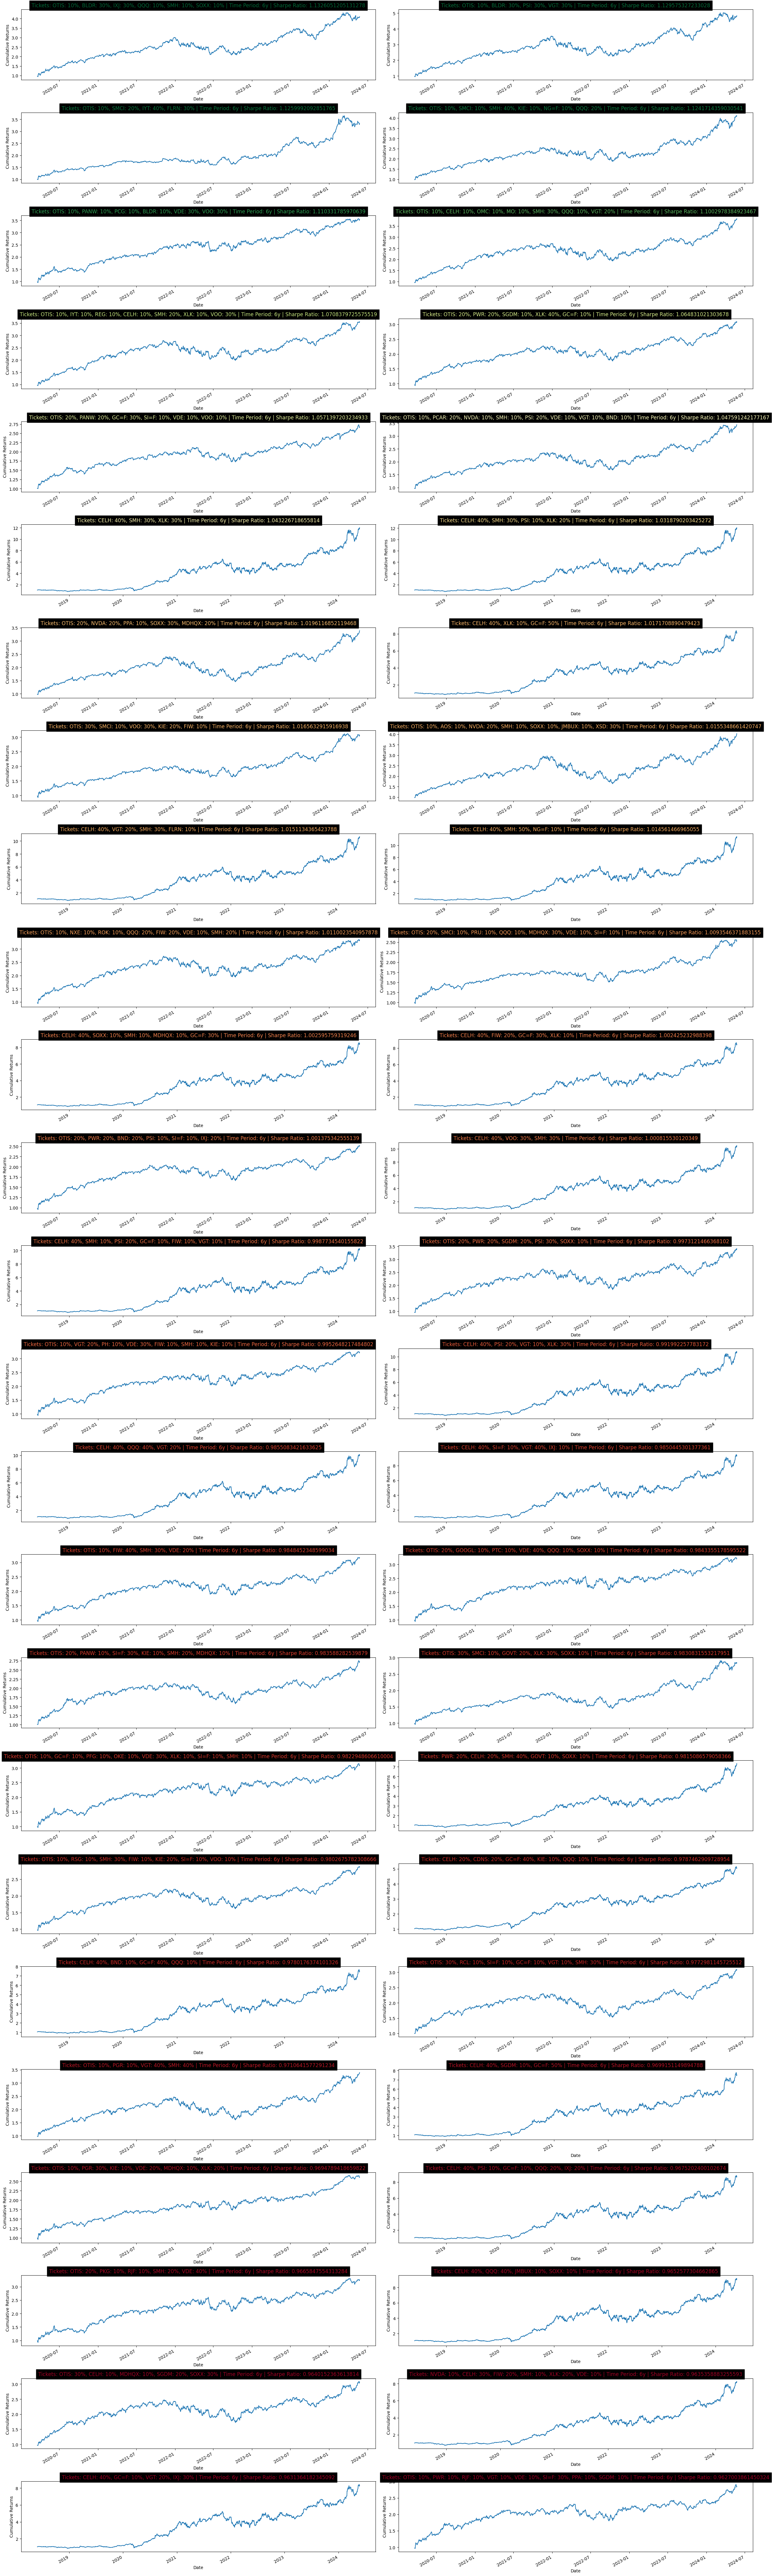

In [7]:
simulations_to_analyze = 50 # Don't show every simulation but only the best ones

# Sort simulations by Sharpe ratio in descending order
simulations.sort(key=lambda x: x["sharpe_ratio"], reverse=True)

# Define a colormap from green to red
cmap = plt.cm.get_cmap('RdYlGn')
norm = mcolors.Normalize(vmin=min(sim["sharpe_ratio"] for sim in simulations[:simulations_to_analyze]),
                         vmax=max(sim["sharpe_ratio"] for sim in simulations[:simulations_to_analyze]))

# Plot each simulation in a subplot
fig, axes = plt.subplots(nrows=math.ceil(simulations_to_analyze / 2), ncols=2, figsize=(25, int(simulations_to_analyze * 1.7)))
axes = axes.flatten()

for idx, sim in enumerate(simulations[:simulations_to_analyze]):
    ax = axes[idx]
    sim["series_cum_returns"].plot(ax=ax)
    tickets_splits = ", ".join([f"{ticket}: {split}%" for ticket, split in sim["tickets"].items()])
    title = f"Tickets: {tickets_splits} | Time Period: {sim['time_period']} | Sharpe Ratio: {sim['sharpe_ratio']}"
    color = cmap(norm(sim["sharpe_ratio"]))
    ax.set_title(title, color=color, bbox={'facecolor': 'black', 'pad': 5})
    ax.set_xlabel("Date")
    ax.set_ylabel("Cumulative Returns")

plt.tight_layout()
plt.show()

In [8]:
simulations[0]["tickets"]

{'OTIS': 10, 'BLDR': 30, 'IXJ': 30, 'QQQ': 10, 'SMH': 10, 'SOXX': 10}

In [9]:
# How much did the simulation earned?
simulations[0]['earnings']

3.1028367071043794

In [10]:
def calculate_annual_rate(years, final_earnings):
    return (final_earnings ** (1/years)) - 1

years = int(simulations[0]['time_period'][0])
final_earnings = simulations[0]['earnings'] + 1
annual_rate = calculate_annual_rate(years, final_earnings)
print(f"The annual interest rate needed to reach {final_earnings*100}% of your investment in {years} years is {annual_rate:.2%}")

The annual interest rate needed to reach 410.28367071043795% of your investment in 6 years is 26.53%


In [11]:
# Tickets that are more present in the top simulations
best_simulations = simulations[:simulations_to_analyze]
tickets_showup = {}

for ticket in list(tickets.keys()):
  tickets_showup[ticket] = 0

for best_simulation in best_simulations:
  for ticket in best_simulation["tickets"].keys():
    tickets_showup[ticket] += 1

dict(sorted(tickets_showup.items(), key=lambda item: item[1], reverse=True))

{'OTIS': 30,
 'SMH': 24,
 'CELH': 23,
 'GC=F': 13,
 'VDE': 13,
 'VGT': 13,
 'QQQ': 11,
 'XLK': 11,
 'SOXX': 10,
 'SI=F': 9,
 'FIW': 8,
 'PSI': 8,
 'KIE': 7,
 'VOO': 6,
 'MDHQX': 6,
 'IXJ': 5,
 'SGDM': 5,
 'SMCI': 5,
 'PWR': 5,
 'NVDA': 4,
 'BND': 3,
 'BLDR': 3,
 'PANW': 3,
 'GOVT': 2,
 'NG=F': 2,
 'PPA': 2,
 'IYT': 2,
 'FLRN': 2,
 'JMBUX': 2,
 'PGR': 2,
 'RJF': 2,
 'XSD': 1,
 'NXE': 1,
 'CDNS': 1,
 'AOS': 1,
 'GOOGL': 1,
 'MO': 1,
 'OMC': 1,
 'OKE': 1,
 'PCAR': 1,
 'PKG': 1,
 'PH': 1,
 'PCG': 1,
 'PFG': 1,
 'PRU': 1,
 'PTC': 1,
 'REG': 1,
 'RSG': 1,
 'ROK': 1,
 'RCL': 1,
 'EXPI': 0,
 'AMD': 0,
 'AVGO': 0,
 'LRCX': 0,
 'AAPL': 0,
 'AMZN': 0,
 'META': 0,
 'NFLX': 0,
 'MMM': 0,
 'ABT': 0,
 'ABBV': 0,
 'ACN': 0,
 'ADBE': 0,
 'AES': 0,
 'AFL': 0,
 'A': 0,
 'APD': 0,
 'ABNB': 0,
 'AKAM': 0,
 'ALB': 0,
 'ARE': 0,
 'ALGN': 0,
 'ALLE': 0,
 'LNT': 0,
 'ALL': 0,
 'NRG': 0,
 'NUE': 0,
 'NVR': 0,
 'NXPI': 0,
 'ORLY': 0,
 'OXY': 0,
 'ODFL': 0,
 'ON': 0,
 'ORCL': 0,
 'PARA': 0,
 'PAYX': 0,
 'PAYC': 0

In [12]:
# Sectors that are more present in the top simulations
best_simulations = simulations[:simulations_to_analyze]
sectors_showup = {}

for ticket in list(tickets.keys()):
  if tickets[ticket]["sector"] not in list(sectors_showup.keys()):
    sectors_showup[tickets[ticket]["sector"]] = 1
  else:
    sectors_showup[tickets[ticket]["sector"]] += 1

for best_simulation in best_simulations:
  for ticket in best_simulation["tickets"].keys():
    sectors_showup[tickets[ticket]["sector"]] += 1

dict(sorted(sectors_showup.items(), key=lambda item: item[1], reverse=True))

{'Technology, Media & Telecom': 109,
 'Industrial Goods & Machinery': 51,
 'Financial Services': 43,
 'Mining': 32,
 'Consumer': 30,
 'Oil & Gas': 21,
 'General': 19,
 'Healthcare': 14,
 'Construction': 12,
 'Business & Consumer Services': 10,
 'Power & Utilities': 8,
 'Real Estate': 6,
 'Aerospace & Defense': 4,
 'Transport, Infrastructure & Logistics': 4,
 'Chemicals': 3,
 'Travel & Tourism': 3,
 'Automotive': 3,
 'Retail & Wholesale': 2,
 'Packaging': 2}